## Quantitative Structure-Property Relationships



Quantitative Structure-Property Relationships (QSPR) and Quantitative
Structure-Activity Relationships (QSAR) use statistical models to relate a set
of predictor values to a response variable. Molecules are described using a set
of *descriptors*, and then mathematical relationships can be developed to explain
observed properties. In QSPR and QSAR, physico-chemical properties of theoretical
descriptors of chemicals are used to predict either a physical property or a
biological outcome.



## Molecular Descriptors



A molecular descriptor is &ldquo;final result of a logical and mathematical procedure,
which transforms chemical information encoded within a symbolic repre-sentation
of a molecule into a useful number or the result of some standardized
experiment&rdquo; (Todeschini, R.; Consonni, V. *Molecular descriptors for
chemoinformatics* **2009** Wiley‑VCH, Weinheim). You are already familiar with
descriptors such as molecular weight or number of heavy atoms and we have
queried PubChem for data such as XLogP. We&rsquo;ll examine just a few simple
descriptors, but thousands have been developed for applications in QSPR.



## Using rdkit and mordred to calculate descriptors



Clearly we have been using algorithms for calculating these indices. This is
time consuming for an individual, but programs can be used to complete this much
easier. We will use the rdkit and mordred python libraries to help us out.



In [2]:
from rdkit import Chem                            # imports the Chem module from rdkit
from mordred import Calculator, descriptors       # imports mordred descriptor library
calc = Calculator(descriptors, ignore_3D=True)    # sets up a function reading descriptors
len(calc.descriptors) # tells us how many different types of descriptors are available in the library

1613

### Wiener Index



We already calculated the Wiener index for *n*-pentane and 2-methylpentane. Now
let&rsquo;s have mordred do it for us.



In [3]:
from mordred import WienerIndex
pentane = Chem.MolFromSmiles('CCCCC')                  # Use rdkit to create a mol file from the smiles string for n-pentane
methyl_pentane = Chem.MolFromSmiles('CCCC(C)C')        #  and for 2-methylpentane
wiener_index = WienerIndex.WienerIndex()               # create descriptor instance for Wiener index
result1 = wiener_index(pentane)                        # calculate wiener index for n-pentane
result2 = wiener_index(methyl_pentane)                 #  and for 2-methylpentane
print("The Wiener index for n-pentane is: ", result1)  # display result
print("The Wiener index for 2-methylpentane is: ", result2)

The Wiener index for n-pentane is:  20
The Wiener index for 2-methylpentane is:  32


### Zagreb Indices



And we can do the same for the different Zagreb indices for *n*-pentane and
2-methylpentane.



In [4]:
from mordred import ZagrebIndex

zagreb_index1 = ZagrebIndex.ZagrebIndex(version = 1)            # create descriptor instance for Zagreb index 1
zagreb_index2 = ZagrebIndex.ZagrebIndex(version = 2)            # create descriptor instance for Zagreb index 1

result_Z1 = zagreb_index1(pentane)                              # calculate Z1 descriptor value for n-pentane
result_Z2 = zagreb_index2(pentane)                              # calculate Z2 descriptor value for n-pentane
print("The Zagreb index 1 for n-pentane is:", result_Z1)
print("The Zagreb index 2 for n-pentane is:", result_Z2)

result_Z1 = zagreb_index1(methyl_pentane)                       # and for 2-methylpentane as well
result_Z2 = zagreb_index2(methyl_pentane)                      
print("The Zagreb index 1 for 2-methylpentane is:", result_Z1)
print("The Zagreb index 2 for 2-methylpentane is:", result_Z2)

The Zagreb index 1 for n-pentane is: 14.0
The Zagreb index 2 for n-pentane is: 12.0
The Zagreb index 1 for 2-methylpentane is: 20.0
The Zagreb index 2 for 2-methylpentane is: 18.0


As you can see from the code above, each index will have different code that
needs to be followed for programming. Each descriptor and the resulting code
syntax can be found here
[http://mordred-descriptor.github.io/documentation/master/api/modules.html](http://mordred-descriptor.github.io/documentation/master/api/modules.html)



### Looping through a list of molecules



Now that we have an understanding on how rdkit and mordred work to get our
descriptors, let&rsquo;s simplify the code using a looping structure:



In [5]:
smiles = ["CCC", "CCCC", "CCCCC", "CCCC(C)C","CC(C)C(C)C"]         #store smiles strings in a list

for smile in smiles:
    mol = Chem.MolFromSmiles(smile)                      # convert smiles string to mol file
    result_Z1 = zagreb_index1(mol)                       # calculate Z1 descriptor value
    result_Z2 = zagreb_index2(mol)                       # calculate Z2 descriptor value
    print("The Zagreb index 1 for", smile, "is:", result_Z1)
    print("The Zagreb index 2 for", smile, "is:", result_Z2)
    print()

The Zagreb index 1 for CCC is: 6.0
The Zagreb index 2 for CCC is: 4.0

The Zagreb index 1 for CCCC is: 10.0
The Zagreb index 2 for CCCC is: 8.0

The Zagreb index 1 for CCCCC is: 14.0
The Zagreb index 2 for CCCCC is: 12.0

The Zagreb index 1 for CCCC(C)C is: 20.0
The Zagreb index 2 for CCCC(C)C is: 18.0

The Zagreb index 1 for CC(C)C(C)C is: 22.0
The Zagreb index 2 for CC(C)C(C)C is: 21.0



## Using descriptors to predict molecular properties



For this exercise we will take a series of alkanes and create an equation that
will allow us to predict boiling points. We will start with a 30 molecule alkane
training set. We will obtain various descriptors and see how they can predict
the physical property boiling point.

For this exercise we will be using the [pandas](https://pandas.pydata.org/) (Python Data Analysis) library to
help us read, write and manage data. We will also use matplotlib to generate
graphs.



### Boiling Point data



Let&rsquo;s start by reading and graphing a set of boiling point data. First we read
our csv file into a pandas &ldquo;dataframe&rdquo;. Notice that we can generate a nicely
formatted table from our dataframe by just entering the name of the dataframe on
the last line.



In [6]:
import pandas as pd        # import the Python Data Analysis Library with the shortened name pd
df = pd.read_csv("BP.csv") # read in the file into a pandas dataframe
df                         # print the dataframe

,compound,name,BP_C,BP_K,SMILES,MW
0,1,Methane,-162.2,110.95,C,16.043
1,2,Ethane,-88.6,184.55,CC,30.070
2,3,propane,-42.2,230.95,CCC,44.100
3,4,butane,-0.1,273.05,CCCC,58.120
4,5,2-methylpropane,-11.2,261.95,CC(C)C,58.120
5,6,pentane,36.1,309.25,CCCCC,72.150
6,7,2-methylbutane,27.0,300.15,CC(C)CC,72.150
7,8,"2,2-dimethylpropane",9.5,282.65,CC(C)(C)C,72.150
8,9,hexane,68.8,341.95,CCCCCC,86.180
9,10,2-methylpentane,60.9,334.05,CC(C)CCC,86.180


### Graphing the data



Now we can graph the data using matplotlib.



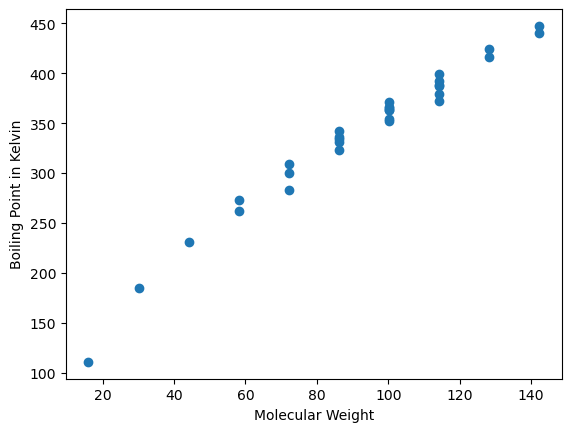

In [7]:
import matplotlib.pyplot as plt

plt.scatter(df.MW, df.BP_K)     # plot of boiling point (in K) vs molecular weight
plt.xlabel('Molecular Weight')
plt.ylabel('Boiling Point in Kelvin')
plt.show()

Clearly from the data we can see that we have multiple molecules with the same
molecular weight, but different boiling points. Molecular weight is therefore
not the best predictor of boiling point. We can see if there are other
descriptors that we can use such as Weiner or Zagreb. Let&rsquo;s add various
descriptors to the dataframe.



### Adding descriptors to the dataset



We can now calculate the Wiener and Zagreb indices for each of our
hydrocarbons and add them to the dataframe.



In [8]:
# create new lists to store results we calculate
result_Wiener= []
result_Z1= []
result_Z2= []

for index, row in df.iterrows():                # iterate through each row of the CSV data
    SMILE = row['SMILES']                       # get SMILES string from row
    mol = Chem.MolFromSmiles(SMILE)             # convert smiles string to mol file
    result_Wiener.append(wiener_index(mol))     # calculate Wiener index descripter value
    result_Z1.append(zagreb_index1(mol))        # calculate zagreb (Z1) descriptor value
    result_Z2.append(zagreb_index2(mol))        # calculate zagreb (Z2) descriptor value

df['Wiener'] = result_Wiener           # add the results for WienerIndex to dataframe
df['Z1'] = result_Z1                   # add the results for Zagreb 1 to dataframe
df['Z2'] = result_Z2                   # add the results for Zagreb 2 to dataframe
df                                     # print the updated dataframe

,compound,name,BP_C,BP_K,SMILES,MW,Wiener,Z1,Z2
0,1,Methane,-162.2,110.95,C,16.043,0,0.0,0.0
1,2,Ethane,-88.6,184.55,CC,30.070,1,2.0,1.0
2,3,propane,-42.2,230.95,CCC,44.100,4,6.0,4.0
3,4,butane,-0.1,273.05,CCCC,58.120,10,10.0,8.0
4,5,2-methylpropane,-11.2,261.95,CC(C)C,58.120,9,12.0,9.0
5,6,pentane,36.1,309.25,CCCCC,72.150,20,14.0,12.0
6,7,2-methylbutane,27.0,300.15,CC(C)CC,72.150,18,16.0,14.0
7,8,"2,2-dimethylpropane",9.5,282.65,CC(C)(C)C,72.150,16,20.0,16.0
8,9,hexane,68.8,341.95,CCCCCC,86.180,35,18.0,16.0
9,10,2-methylpentane,60.9,334.05,CC(C)CCC,86.180,32,20.0,18.0


Now we can see how each of these descriptors are related to the boiling points
of their respective compounds.



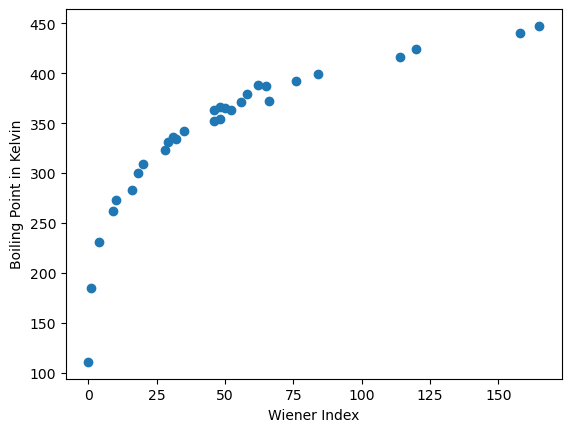

In [9]:
plt.scatter(df.Wiener, df.BP_K) # plot of BP versus Wiener index
plt.xlabel('Wiener Index')
plt.ylabel('Boiling Point in Kelvin')
plt.show()

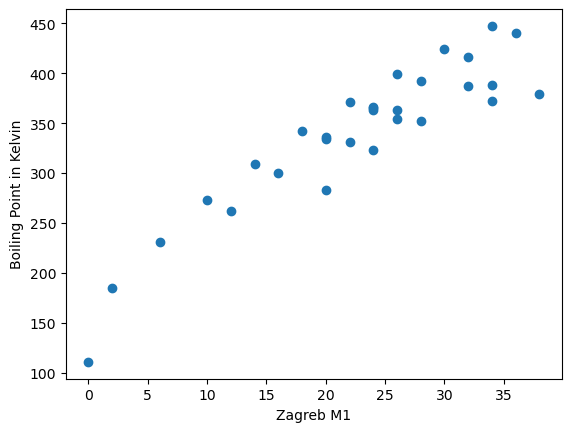

In [10]:
plt.scatter(df.Z1, df.BP_K) # plot of BP versus Zagreb M1
plt.xlabel('Zagreb M1')
plt.ylabel('Boiling Point in Kelvin')
plt.show()

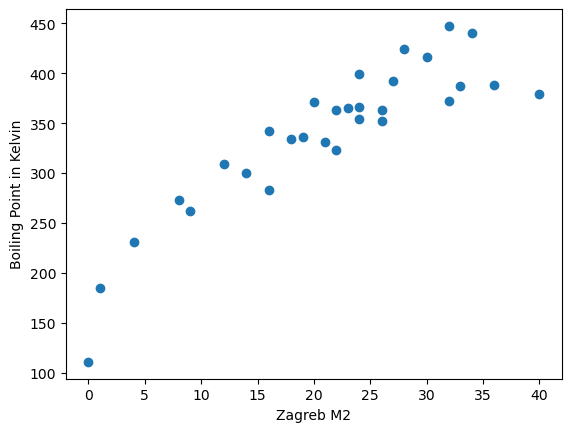

In [11]:
plt.scatter(df.Z2, df.BP_K) # plot of BP versus Zagreb M2
plt.xlabel('Zagreb M2')
plt.ylabel('Boiling Point in Kelvin')
plt.show()

Clearly molecular weight was somewhat predictive, but problematic. It looks like
using the other indicators we have have some other ways to predict boiling
point.

One option is write this data to a new CSV file and work in Microsoft Excel to
perform a regression analysis. Exporting the data is straightforward and your
instructor may provide instructions on how to analyze the data using Excel.



In [12]:
df.to_csv('bp_descriptor_data.csv', encoding='utf-8', index=False)

## Mulitple regression analysis using statsmodels



The [statsmodels](https://www.statsmodels.org/stable/index.html) package provides numerous tools for performaing statistical
analysis using Python. In this case, we want to perform a *multiple linear
regression* using all of our descriptors (molecular weight, Wiener index, Zagreb
indices) to help predict our boiling point.



In [ ]:
import statsmodels.api as sm           # import the statsmodels library as sm
X = df[["MW", "Wiener", "Z1", "Z2"]]   # select our independent variables
X = sm.add_constant(X)                 # add an intercept to our model
y = df[["BP_K"]]                       # select BP as our dependent variable
model = sm.OLS(y,X).fit()              # set up our model
predictions = model.predict(X)         # make the predictions
print(model.summary())                 # print out statistical summary

Note above that we now have coeffiecients for an equation that can be used for prediction of boiling points for molecules not included in our dataset. The equation would be:

    Predicted BP = 4.4325 * MW - 0.6411 * Weiner - 4.3920 * Z1 + 0.2982 * Z2 + 55.5695

We can use this equation to predict the boiling point of a new molecule. However, before we do, we need to explore the validity of the model.

### Model summary and analysis using partial regression plots



A quick look at the results summary shows that the model has an excellent
R-squared value. Upon more careful examination, you may notice that one of our
descriptors has a very large P value. This would indicate that perhaps the Z2
descriptor is not working well in this case. We can generate a more graphical
interpretation that will make this more obvious.



In [ ]:
fig = plt.figure(figsize=(10,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

Part of the reason that Z2 may not be predictive in this model is that there is colinearity with the Z1 descriptor. Both descriptors have similar calculations (as outlined in the Libretexts page for this activity). Later on in this exercise we can explore dropping this descriptor.

### How good is our model?



If we look at a plot of actual versus predicted boiling points



In [ ]:
pred_bp = model.fittedvalues.copy()       # use our model to create a set of predicted bp's
fig, ax = plt.subplots(figsize=(8, 5))
lmod = sm.OLS(pred_bp, df.BP_K)           # linear regression of observed vs predicted bp's
res = lmod.fit()                          # run fitting
plt.scatter(pred_bp, df.BP_K)             # plot of of observed vs predicted bp's
plt.ylabel('observed boiling point (K)')
plt.xlabel('predicted boiling point (K)')
plt.show()
print(res.summary())                      # print linear regression stats summary

The model appears to have very good predictability (R-squared = 1.000) within the original 30 molecule data set. One way to test this model is to use a new molecule with its descriptors to see how well it is predicted. One molecule in the dataset is 2-methylheptane. It has the following data:
MW = 114.232
Wiener Index = 79
Z1 = 28
Z2 = 26
Boiling Point = 390.6 K

Using the equation from above we can determine that the boiling point from the equation 
    Predicted BP = 4.4325 * MW - 0.6411 * Weiner - 4.3920 * Z1 + 0.2982 * Z2 + 55.5695
is 396.0 K. The model gives a 1.4% error for prediction of the boiling point outide the training set. 

We had mentioned earlier that Z2 may not be very predictive in this model. We can remove the variable an rerun the analysis to see if we can improve the predictability of the model.

In [ ]:
import statsmodels.api as sm           # import the statsmodels library as sm
X = df[["MW", "Wiener", "Z1"]]         # select our independent variables, this time without Z2
X = sm.add_constant(X)                 # add an intercept to our model
y = df[["BP_K"]]                       # select BP as our dependent variable
model = sm.OLS(y,X).fit()              # set up our model
predictions = model.predict(X)         # make the predictions
print(model.summary())                 # print out statistical summary

The model appears to have very good predictability (R-squared = 0.994) within the original 30 molecule data set. Let's reexamine 2-methylheptane:
MW = 114.232
Wiener Index = 79
Z1 = 28
Boiling Point = 390.6 K

Using the equation from above we can determine that the boiling point from the equation 
    Predicted BP = 4.4114 * MW - 0.6397 * Weiner - 4.0260 * Z1  + 55.4979
is 396.2 K. The model also gives a 1.4% error for prediction of the boiling point outide the training set. 

We can see here that Z2 doesn't really change the result of the calculation, and can probably be best left out to simplify the model.

Keep in mind that we have completed this analysis with only a training set of 30 molecules. If the training set had more molecules, you should be able to develop a better model.

## Assignment



You originally ran this analysis on a 30 molecule data set (BP.CSV). You also have available to you a 102 molecule data set (102BP.CSV). 

* Complete the above analysis using the expanded data set to determine if a better predictive model can be obtained with a larger training set. Note that 2-methylheptane is in this new dataset so you will need to choose a new test molecule.

When you have completed the analysis, you will create a new analysis:
* Choose four new topological and other calculated descriptors found in Mordred http://mordred-descriptor.github.io/documentation/master/api/modules.html 

*	Complete simple linear analysis for each of your new descriptors. 
*	Complete a multiple linear regression to create an equation that best represents the data boiling point data and your descriptors. 
*	Create a separate sheet that has your regression data. 
*	Make a plot of Actual vs Predicted BP for your regression.
*	Choose a new molecule not in the dataset (not 2-methylheptane, be creative and use chemical intuition).
*	Use your multiple linear equation to predict this molecule’s BP and look of the literature value.
*	Write a short one-two page paper that includes:
    *	What your new chosen descriptors mean
    *	Which new chosen descriptors correlate
    *	What is the overall equation calculated
    *	How to choose the molecule to test
    *	How close this multiple linear regression predicts your boiling point of your molecule


